# feature selection 1

## curse of dimensionality

The "curse of dimensionality" refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces. Key points include:

1. **Increased Volume**: As the number of dimensions increases, the volume of the space increases exponentially. This means that data points become sparse, making it difficult to find patterns or clusters.
2. **Distance Metrics**: In high-dimensional spaces, the concept of distance becomes less meaningful. Distances between points tend to converge, making it hard to distinguish between close and far points.
3. **Overfitting**: High-dimensional data can lead to overfitting in machine learning models, as the model may capture noise instead of the underlying pattern.
4. **Computational Complexity**: The computational cost of processing high-dimensional data increases significantly, requiring more resources and time.

### Illustration with Data and Code

Let's illustrate the curse of dimensionality with a simple example using Python and scikit-learn.

#### Step-by-Step Plan:
1. Generate random data in 2D and 10D.
2. Calculate and compare the distances between points in both spaces.
3. Visualize the data and distances.



Mean distance in 2D: 0.49957630382472396
Mean distance in 10D: 1.2655965087564176


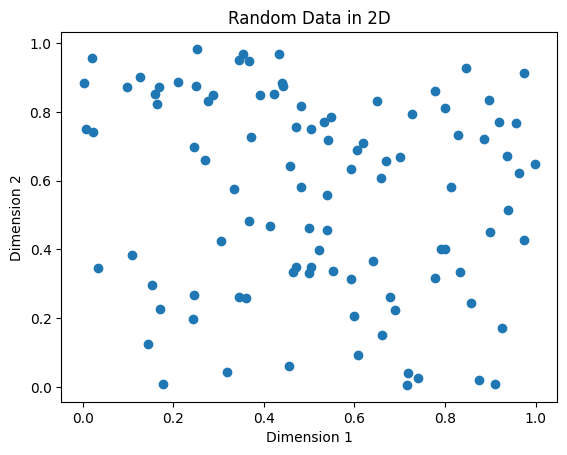

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Generate random data in 2D
data_2d = np.random.rand(100, 2)

# Generate random data in 10D
data_10d = np.random.rand(100, 10)

# Calculate pairwise distances in 2D
distances_2d = euclidean_distances(data_2d)
mean_distance_2d = np.mean(distances_2d)

# Calculate pairwise distances in 10D
distances_10d = euclidean_distances(data_10d)
mean_distance_10d = np.mean(distances_10d)

print(f"Mean distance in 2D: {mean_distance_2d}")
print(f"Mean distance in 10D: {mean_distance_10d}")

# Visualize the 2D data
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.title("Random Data in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()



### Explanation:
1. **Data Generation**: We generate random data points in 2D and 10D spaces.
2. **Distance Calculation**: We calculate the pairwise Euclidean distances between points in both spaces.
3. **Comparison**: We compare the mean distances to illustrate how distances become less meaningful in higher dimensions.
4. **Visualization**: We plot the 2D data to visualize the distribution of points.

This code demonstrates how the curse of dimensionality affects distance metrics and data sparsity in high-dimensional spaces.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [6]:
# Load the data
ansur_f = pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_m = pd.read_csv('ANSUR_II_MALE.csv')

# print shapes
print(ansur_f.shape)
print(ansur_m.shape)

# combine datasets
ansur_df = pd.concat([ansur_f, ansur_m])
print(ansur_df.shape)

(1986, 99)
(4082, 99)
(6068, 99)


In [7]:
# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

1821 rows in test set vs. 4247 in training set, 98 Features.


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# drop non-numeric columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")




98.7% accuracy on test set vs. 99.0% on training set


# removing features

The above is overfitting - there are 90+ features (columns). 

Now we will remove all but one features which is drastic, but the feature still has value in predicting gender.

In [11]:
# keep only 'neckcircumferencebasee' column
X = ansur_df[['neckcircumferencebase']]

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# fit svc
svc = SVC()
svc.fit(X_train, y_train)

# calculate accuracy
accuracy_test = accuracy_score(y_test, svc.predict(X_test))
accuracy_train = accuracy_score(y_train, svc.predict(X_train))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

93.4% accuracy on test set vs. 93.4% on training set


The model is still very good at predicting with just one feature. 

It is also possible to have the scenario where the model is significantly better with 1 feature than with 90+ features. This is because the 1 feature is very predictive of the target variable, while the other features are not, and overall predictability is reduced by including them.  The curse of dimensionality is a factor here.

### Missing values or little variance


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns

# Load the data
ansur_f = pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_m = pd.read_csv('ANSUR_II_MALE.csv')

# combine datasets
ansur_df = pd.concat([ansur_f, ansur_m])

# print shape
print(ansur_df.shape)


(6068, 99)


In [10]:
ansur_num = ansur_df.select_dtypes(include=[np.number])

print(ansur_num.shape)

sel = VarianceThreshold(threshold=1)
sel.fit(ansur_num)

mask = sel.get_support()
#print(mask)

reduced_ansur = ansur_num.loc[:, mask]
print(reduced_ansur.shape)

(6068, 94)
(6068, 93)


In [11]:

# Create the VarianceThreshold object with a variance with a threshold of 1.0.
thresholder = VarianceThreshold(threshold=1.0)

# Conduct variance thresholding
ansur_df_transformed = thresholder.fit_transform(ansur_df.select_dtypes(include=[np.number]))

# Print the shape of the transformed data
print(ansur_df_transformed.shape)

# Create a DataFrame from the output of the variance thresholding
ansur_df_transformed = pd.DataFrame(ansur_df_transformed)

# print the output
print(ansur_df_transformed.head())




(6068, 93)
      0       1      2      3       4   ...      88     89     90    91         92
0  231.0  1282.0  301.0  204.0  1180.0  ...   942.0  152.0  756.0  65.7  26.997041
1  194.0  1379.0  320.0  207.0  1292.0  ...  1032.0  155.0  815.0  53.4  19.262506
2  183.0  1369.0  329.0  233.0  1271.0  ...  1035.0  162.0  799.0  66.3  22.647148
3  261.0  1356.0  306.0  214.0  1250.0  ...   999.0  173.0  818.0  78.2  28.378575
4  309.0  1303.0  308.0  214.0  1210.0  ...   911.0  152.0  762.0  88.6  35.853259

[5 rows x 93 columns]


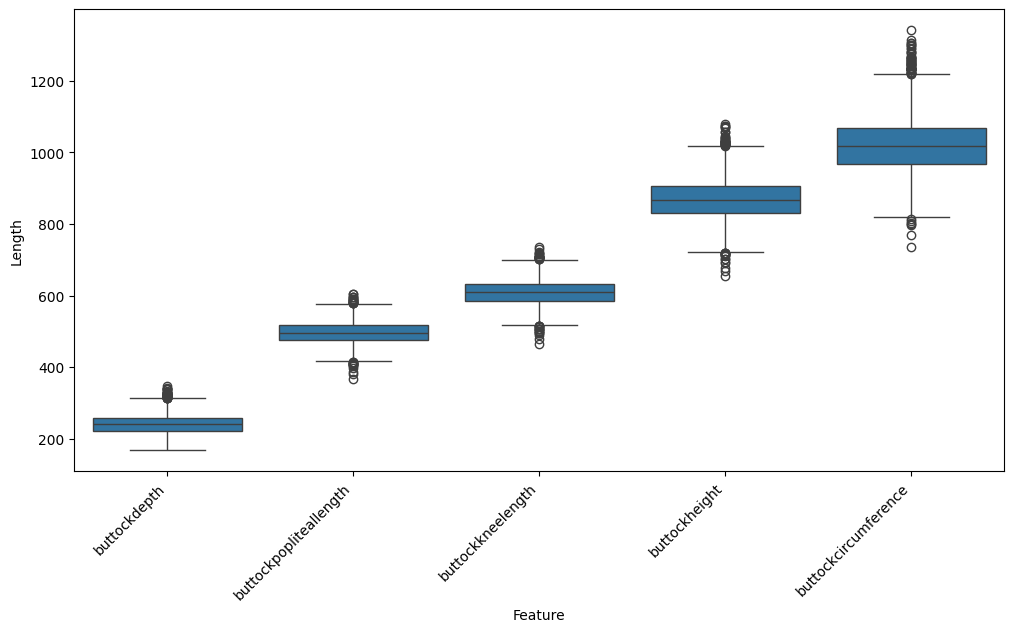

In [ ]:
#print(ansur_df.columns)

# create buttock df
buttock_df = ansur_df[['buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'buttockcircumference', 'buttockdepth']]

# sns boxplot

# Order features by length (mm)
buttock_df_sorted = buttock_df.melt(var_name='Feature', value_name='Length')
buttock_df_sorted = buttock_df_sorted.groupby('Feature').mean().sort_values(by='Length').reset_index()

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Length', data=buttock_df.melt(var_name='Feature', value_name='Length'), order=buttock_df_sorted['Feature'])
plt.xticks(rotation=45, ha='right')
plt.show()

Data should be normalised and missing values should be handled given the differences.

Instead of removing one feature, as in the non-normalised data, the same process removes 48 features on normalised data.

In [18]:
# createvariance threshold object
sel = VarianceThreshold(threshold=0.005)

sel.fit(ansur_num/ansur_num.mean())
mask = sel.get_support()
reduced_ansur = ansur_num.loc[:, mask]
print(reduced_ansur.shape)

(6068, 45)


### Why Normalize Data Before Using VarianceThreshold:
Normalization ensures that all features are on the same scale, which is important because the `VarianceThreshold` method removes features based on their variance. Without normalization, features with larger scales might dominate and skew the variance calculation, leading to potentially misleading results.

### How to Determine the Threshold:
- **Default Threshold**: The default threshold is 0, which removes features with zero variance (constant features).
- **Custom Threshold**: To set a custom threshold, you can:
  - **Analyze Variance Distribution**: Plot the variance of each feature and choose a threshold that removes low-variance features while retaining informative ones.
  - **Domain Knowledge**: Use knowledge about the data to set a threshold that makes sense for your specific use case.



### missing values

In [22]:
# import pokemon data
pokemon = pd.read_csv('pokemon.csv')

#missing values
missing = pokemon.isnull().sum()
#print(missing)

print(pokemon.isna().sum()/len(pokemon))

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64


Almost half of rows have missing value for 'Type 2'

We can remove this feature using a mask, or we can use the 'SimpleImputer' to fill in the missing values.

In [23]:
# fewer than 30% missing values = True value
mask = pokemon.isna().sum() / len(pokemon) < 0.3
print(mask)


#              True
Name           True
Type 1         True
Type 2        False
Total          True
HP             True
Attack         True
Defense        True
Sp. Atk        True
Sp. Def        True
Speed          True
Generation     True
Legendary      True
dtype: bool


In [26]:

# filter columns
reduced_pokemon = pokemon.loc[:, mask]
print(reduced_pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 69.7+ KB
None


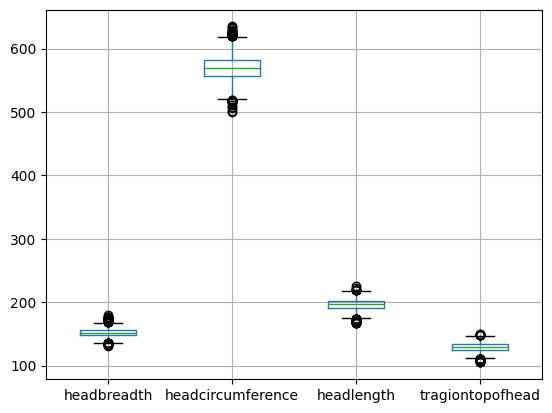

In [31]:
#print(ansur_df.columns)

# create buttock df
head_df = ansur_df[['headbreadth', 'headcircumference',
       'headlength','tragiontopofhead']]

head_df.boxplot()
plt.show()

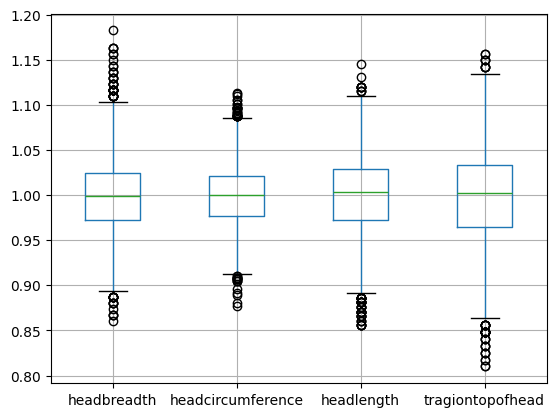

In [32]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [33]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
dtype: float64


We can decide a threshold for removing features with low variance.

In [34]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")

Dimensionality reduced from 4 to 4.


###  removing features withmany missing values


In [36]:
# load data
school_df = pd.read_csv('Public_Schools2.csv')

# missing values
missing_val = school_df.isnull().sum()
print(missing_val)

# missing as percentage
missing = school_df.isnull().sum() / len(school_df)
print(missing)

x               0
y               0
objectid_1      0
objectid        0
bldg_id         0
bldg_name       0
address         0
city            0
zipcode         0
csp_sch_id      0
sch_id          0
sch_name        0
sch_label       0
sch_type        0
shared        115
complex       129
label           0
tlt             0
pl              0
point_x         0
point_y         0
dtype: int64
x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64


In [37]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isnull().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:,mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


### Pairwise Correlation

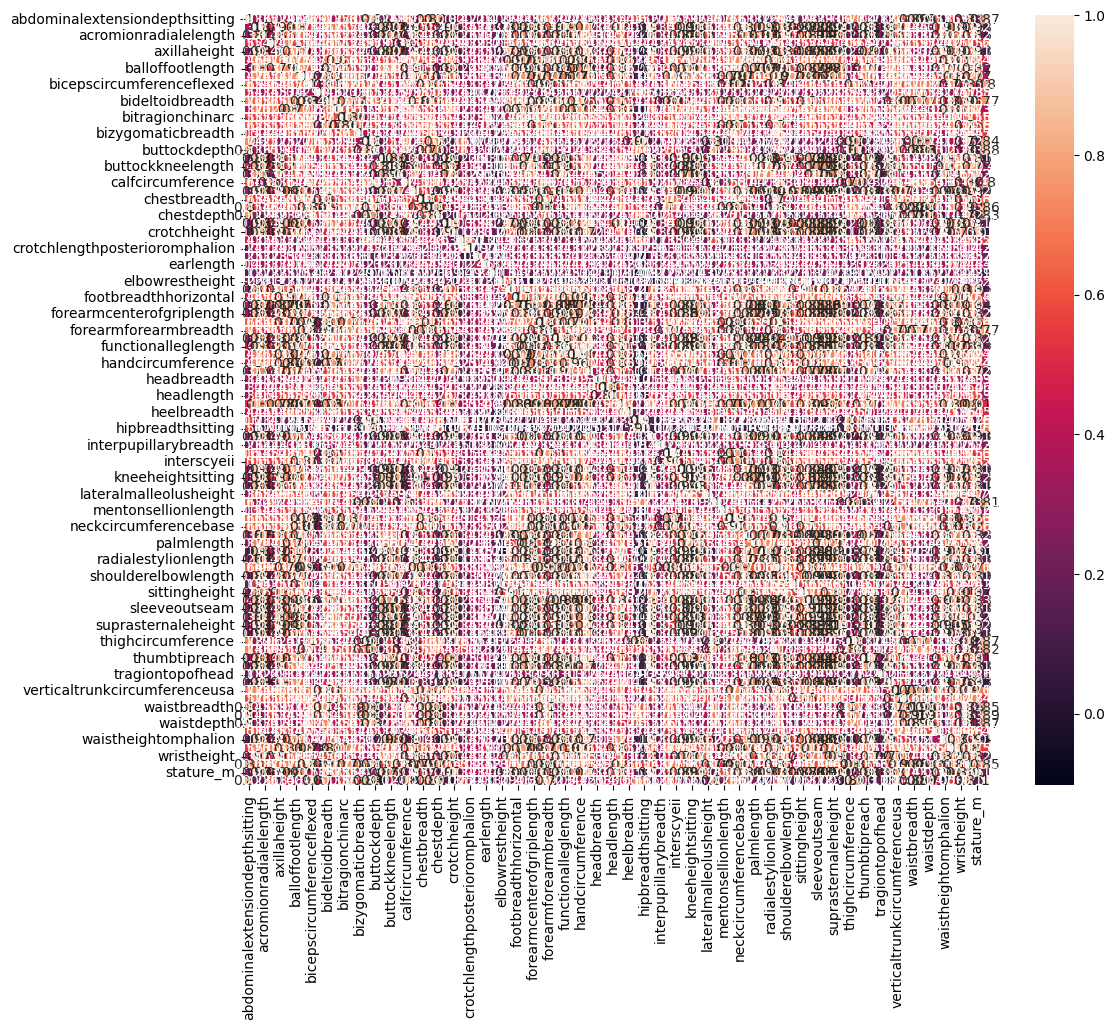

In [39]:
# correlation matrix of ansur_df
corr = ansur_num.corr()

# visualise
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.show()


In [41]:
ansur_num.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [42]:
# cols
cols = ['elbowrestheight', 'wristcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']
reduced_ansur = ansur_num[cols]

# correlation matrix
corr = reduced_ansur.corr()

<Figure size 1200x1000 with 0 Axes>

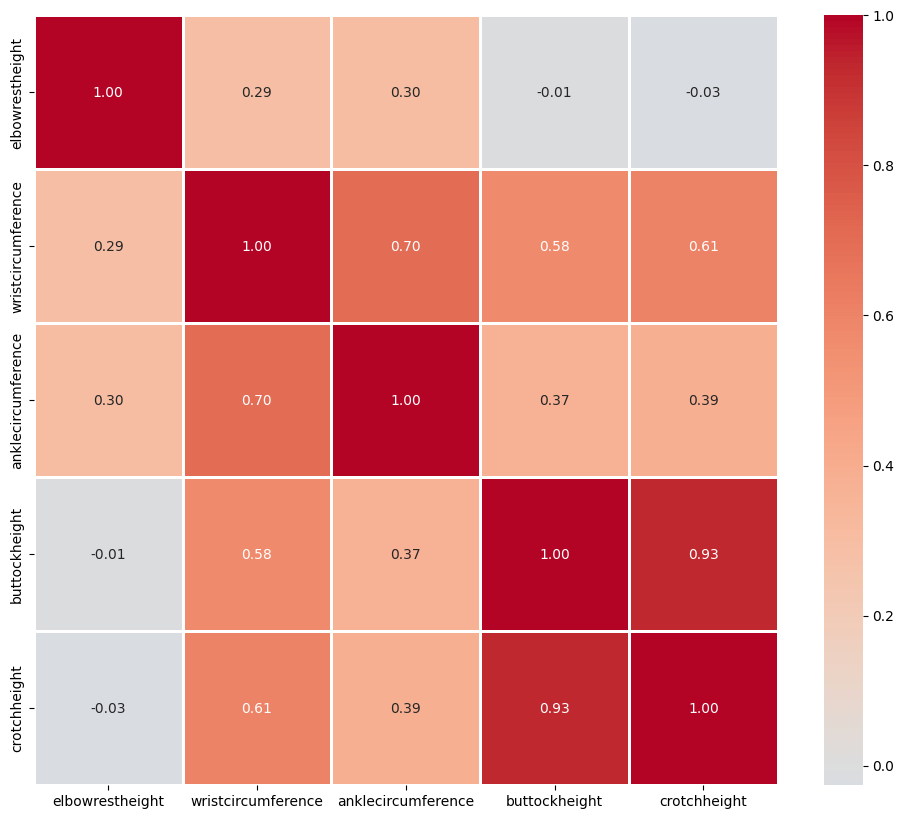

In [46]:
import matplotlib.pyplot as plt

# Define the colormap
cmap = plt.get_cmap("coolwarm")

# sns heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


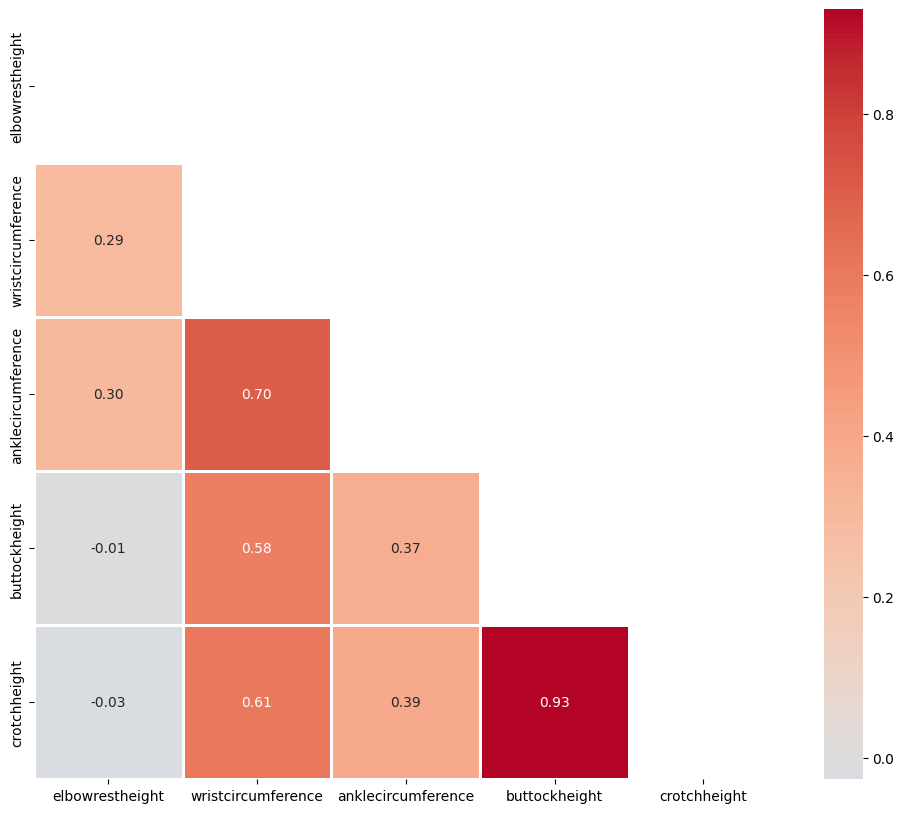

In [51]:
# create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)

# add mask to heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f", mask=mask)
plt.show()

### Removing Highly Correlated Features

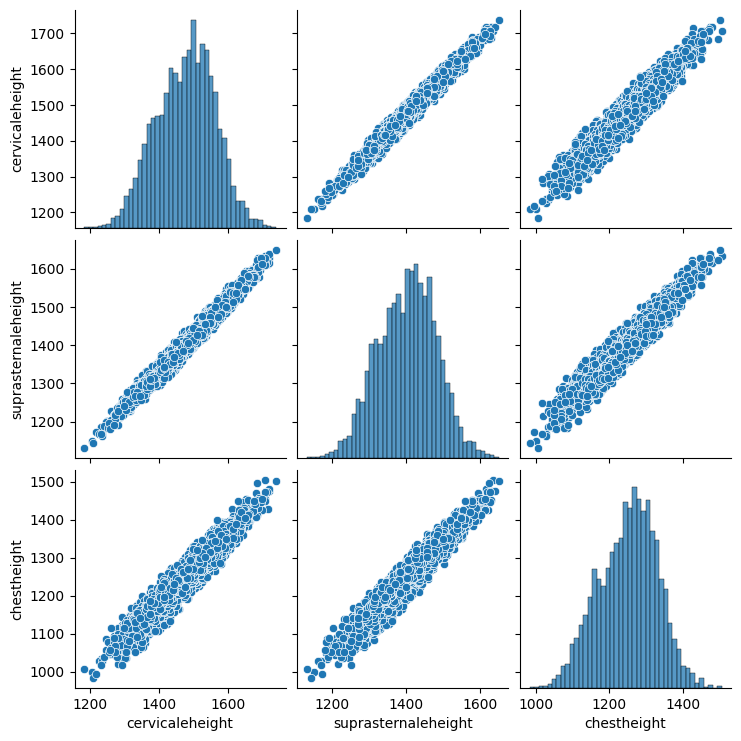

In [57]:
cols = ['cervicaleheight', 'suprasternaleheight', 'chestheight']

# Create the correlation matrix
corr = ansur_df[cols].corr()

# corr pair plot
sns.pairplot(ansur_df[cols])
plt.show()


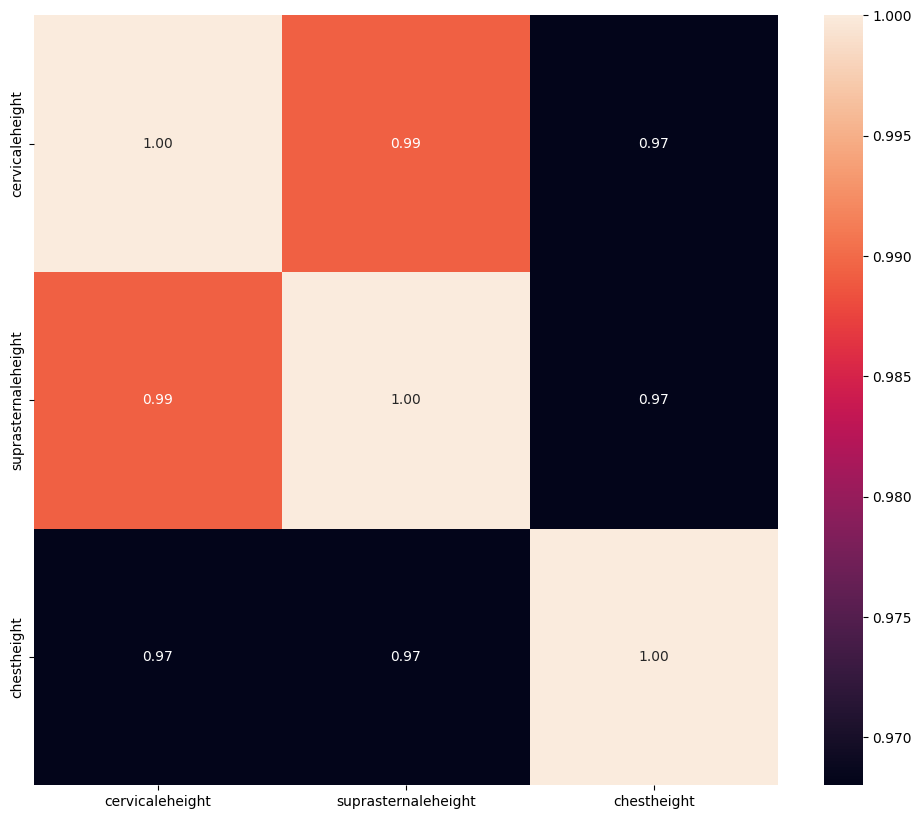

In [58]:

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f" )
plt.show()



Highly correlated features - both chest bones.

Makes sense to drop one of them.

In [59]:
# create positive correlation matrix
pos_corr = ansur_df[cols].corr().abs()

# create mask
mask = np.triu(np.ones_like(pos_corr, dtype=bool))
tri_df = pos_corr.mask(mask)

print(tri_df)

                     cervicaleheight  suprasternaleheight  chestheight
cervicaleheight                  NaN                  NaN          NaN
suprasternaleheight         0.989308                  NaN          NaN
chestheight                 0.968008             0.968019          NaN


In [60]:
# listcomprehensinon to find columns meeting threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

print(to_drop)

['cervicaleheight', 'suprasternaleheight']


In [61]:
# drop columns
reduced_df = ansur_df.drop(to_drop, axis=1)

### working on ansur data

In [62]:
# correlation matrix and abs value 
corr_df = ansur_num.corr().abs()

# create mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# list column names of highly correlated features (0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# drop columns
reduced_df = ansur_num.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 75 columns.
